In [40]:
import pandas as pd
import numpy as np
import datetime
from pandas import Series
from datetime import datetime
import datetime
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [42]:
# link do wybranej stacji 
txt = r'https://meteomodel.pl/dane/historyczne-dane-pomiarowe/?data={}&rodzaj=st&imgwid=254180090&dni=32&ord=desc'
df_lista=[]

# ramy czasowe
start_month_number = 1
end_month_number = 13
rok_poczatkowy = 1999
rok_koncowy = 2019

for year in range(rok_poczatkowy, rok_koncowy):
        for month in range(start_month_number, end_month_number):
            l = []
            this_month = datetime.date.today().replace(year=year, month=month, day=1)
            data = this_month.strftime("%Y-%m-%d")
            link = txt.format(data)
            r = requests.get(link)

            html_doc = r.text
            soup = BeautifulSoup(html_doc)
            table = soup.find('table')
            table_rows = table.find_all('tr')

            for tr in table_rows:
                td = tr.find_all('td')
                row = [tr.text for tr in td]
                l.append(row)
                
            df = pd.DataFrame(columns=["data", "temp_srednia", "temp_max", "temp_min", "tng", "wilg_rh",
                                       "wil_va", "chmurka", "v_wiatru", "v1", "v2", "cisn_mslp", "cisn_ppp", 
                                       "suma_opadu", "opady_x", "opady_y", "snieg_cm",  "snieg_mm",
                                              "1", "2", "3", "4", "5", "6", "7", "8"], data = l)   

            df = df.iloc[2:]
            df_lista.append(df)

In [44]:
# polaczenie listy df, remove duplicates i indeksowanie po dacie
df_polaczone = pd.concat(df_lista)
df_polaczone = df_polaczone.drop_duplicates(['data'], keep='first')
df_polaczone['data'] = pd.to_datetime(df_polaczone['data'], format ='%Y-%m-%d')

df_polaczone.set_index('data', inplace = True)
lista_float = ["temp_srednia", "temp_max", "temp_min", "suma_opadu" ]
df_polaczone[lista_float] = df_polaczone[lista_float].replace('-', 0)
df_polaczone[lista_float] = df_polaczone[lista_float].astype('float64')
df_polaczone.to_csv('1970_2019.csv')

In [45]:
# downsampling do tygodnia/miesciaca
df_weekly = df_polaczone.resample('m').mean()

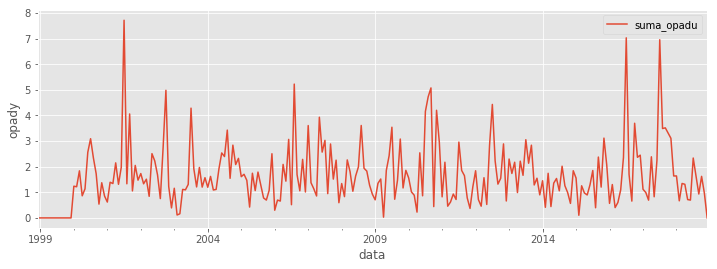

In [46]:
# wykres temperatury
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
df_weekly.suma_opadu.plot(ax = ax)
plt.ylabel('opady', fontdict=None, labelpad=None)
ax.legend()

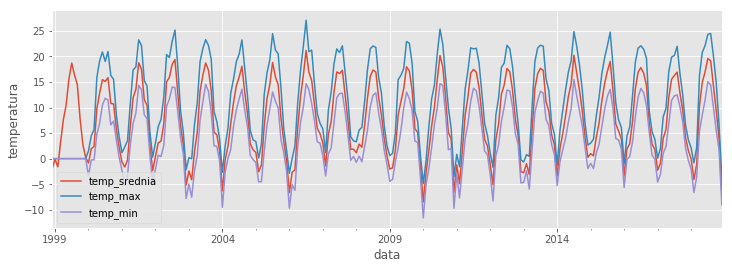

In [48]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
df_weekly.temp_srednia.plot(ax = ax)
df_weekly.temp_max.plot(ax = ax)
df_weekly.temp_min.plot(ax = ax)
plt.ylabel('temperatura', fontdict=None, labelpad=None)
ax.legend()